<a href="https://colab.research.google.com/github/SBMCODED/personal-project-worked-on-/blob/main/The_climatic_change_twitter_dataset_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Import necessary modules
from google.colab import drive

# Mount Google Drive to access data
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Understanding and Preprocessing

In [ ]:
climate='/content/drive/MyDrive/The Climate Change Twitter Dataset.csv'
df=pd.read_csv(climate)

In [ ]:
df.head()

,created_at,id,lng,lat,topic,sentiment,stance,gender,temperature_avg,aggressiveness
0,2006-06-06 16:06:42+00:00,6132,NaN,NaN,Weather Extremes,-0.097180,neutral,female,NaN,aggressive
1,2006-07-23 21:52:30+00:00,13275,-73.949582,40.650104,Weather Extremes,0.575777,neutral,undefined,-1.114768,aggressive
2,2006-08-29 01:52:30+00:00,23160,NaN,NaN,Weather Extremes,0.500479,neutral,male,NaN,aggressive
3,2006-11-07 02:46:52+00:00,57868,NaN,NaN,Weather Extremes,0.032816,neutral,male,NaN,aggressive
4,2006-11-27 14:27:43+00:00,304553,NaN,NaN,Importance of Human Intervantion,-0.090428,neutral,male,NaN,aggressive


In [ ]:


df.isnull().sum()

,0
created_at,0
id,0
lng,10481873
lat,10481873
topic,0
sentiment,0
stance,0
gender,0
temperature_avg,10481873
aggressiveness,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15789411 entries, 0 to 15789410
Data columns (total 10 columns):
 #   Column           Dtype  
---  ------           -----  
 0   created_at       object 
 1   id               int64  
 2   lng              float64
 3   lat              float64
 4   topic            object 
 5   sentiment        float64
 6   stance           object 
 7   gender           object 
 8   temperature_avg  float64
 9   aggressiveness   object 
dtypes: float64(4), int64(1), object(5)
memory usage: 1.2+ GB


In [ ]:
df.describe()

,id,lng,lat,sentiment,temperature_avg
count,1.578941e+07,5.307538e+06,5.307538e+06,1.578941e+07,5.307538e+06
mean,8.459853e+17,-4.639117e+01,3.408025e+01,2.536663e-03,1.245156e+00
std,3.113522e+17,7.523162e+01,2.229430e+01,4.379192e-01,3.799786e+00
min,6.132000e+03,-1.796670e+02,-9.000000e+01,-9.942049e-01,-2.328904e+01
25%,7.354169e+17,-9.536327e+01,3.315067e+01,-3.957429e-01,-1.140978e+00
50%,9.564851e+17,-7.703637e+01,3.995233e+01,-2.328273e-03,1.211522e+00
75%,1.049540e+18,-1.483154e-01,4.550884e+01,4.161248e-01,3.867153e+00
max,1.178912e+18,1.793830e+02,8.500000e+01,9.917458e-01,2.100350e+01


In [ ]:
df.shape

(15789411, 10)

In [ ]:
# 1. Drop rows where 'id' is missing
df.dropna(subset=['id'], inplace=True)

In [ ]:
# 3. Fill numerical columns like 'temperature_avg' with the mean
df['temperature_avg'].fillna(df['temperature_avg'].mean(), inplace=True)

<ipython-input-10-6428cdda61ef>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['temperature_avg'].fillna(df['temperature_avg'].mean(), inplace=True)


In [ ]:
# 3. Fill numerical columns like 'temperature_avg' with the mean
df['temperature_avg'].fillna(df['temperature_avg'].mean(), inplace=True)

<ipython-input-11-6428cdda61ef>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['temperature_avg'].fillna(df['temperature_avg'].mean(), inplace=True)


In [ ]:
# 4. For geographic coordinates (lng, lat), fill with the mean or remove rows
df['lng'].fillna(df['lng'].mean(), inplace=True)
df['lat'].fillna(df['lat'].mean(), inplace=True)

<ipython-input-12-f05283afc80b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['lng'].fillna(df['lng'].mean(), inplace=True)
<ipython-input-12-f05283afc80b>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [ ]:

# Convert 'created_at' to datetime
df['created_at'] = pd.to_datetime(df['created_at'])

In [ ]:
# Check again for missing values after filling
print("Missing values after handling:")
print(df.isnull().sum())

Missing values after handling:
created_at         0
id                 0
lng                0
lat                0
topic              0
sentiment          0
stance             0
gender             0
temperature_avg    0
aggressiveness     0
dtype: int64


In [ ]:
# Handle categorical data: One-Hot Encoding for 'topic', 'gender', and 'stance'
df = pd.get_dummies(df, columns=['topic', 'gender', 'stance'], drop_first=True)


In [ ]:

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [ ]:
# Label encoding for 'sentiment' as it is likely ordinal
label_encoder = LabelEncoder()
df['sentiment'] = label_encoder.fit_transform(df['sentiment'])

In [ ]:
# Convert 'aggressiveness' column to numerical if it contains categories
# Assuming 'aggressive', 'passive', etc. are categories, you can use Label Encoding:

from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
encoder = LabelEncoder()

# Fit and transform the 'aggressiveness' column
df['aggressiveness'] = encoder.fit_transform(df['aggressiveness']) # Apply Label Encoding to 'aggressiveness'

# Now use the encoded column for scaling:
scaler = StandardScaler()
df[['temperature_avg', 'aggressiveness']] = scaler.fit_transform(df[['temperature_avg', 'aggressiveness']])  # Scale the encoded column

# Optionally, drop the original 'aggressiveness' column if you don't need it anymore
# df.drop('aggressiveness', axis=1, inplace=True)

# Data is now clean, and preprocessing is complete.
print(df.head())

                 created_at      id        lng        lat  sentiment  \
0 2006-06-06 16:06:42+00:00    6132 -46.391175  34.080250    3779093   
1 2006-07-23 21:52:30+00:00   13275 -73.949582  40.650104    8255321   
2 2006-08-29 01:52:30+00:00   23160 -46.391175  34.080250    7732424   
3 2006-11-07 02:46:52+00:00   57868 -46.391175  34.080250    4766870   
4 2006-11-27 14:27:43+00:00  304553 -46.391175  34.080250    3818099   

   temperature_avg  aggressiveness  topic_Global stance  \
0     6.047401e-16       -1.577221                False   
1    -1.071212e+00       -1.577221                False   
2     6.047401e-16       -1.577221                False   
3     6.047401e-16       -1.577221                False   
4     6.047401e-16       -1.577221                False   

   topic_Ideological Positions on Global Warming  \
0                                          False   
1                                          False   
2                                          False   
3   

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Scale numerical features (e.g., 'temperature_avg', 'aggressiveness') for machine learning models
scaler = StandardScaler()
df[['temperature_avg', 'aggressiveness']] = scaler.fit_transform(df[['temperature_avg', 'aggressiveness']])

# Data is now clean, and preprocessing is complete.
print(df.head())

                 created_at      id        lng        lat  sentiment  \
0 2006-06-06 16:06:42+00:00    6132 -46.391175  34.080250    3779093   
1 2006-07-23 21:52:30+00:00   13275 -73.949582  40.650104    8255321   
2 2006-08-29 01:52:30+00:00   23160 -46.391175  34.080250    7732424   
3 2006-11-07 02:46:52+00:00   57868 -46.391175  34.080250    4766870   
4 2006-11-27 14:27:43+00:00  304553 -46.391175  34.080250    3818099   

   temperature_avg  aggressiveness  topic_Global stance  \
0     1.703091e-16       -1.577221                False   
1    -1.071212e+00       -1.577221                False   
2     1.703091e-16       -1.577221                False   
3     1.703091e-16       -1.577221                False   
4     1.703091e-16       -1.577221                False   

   topic_Ideological Positions on Global Warming  \
0                                          False   
1                                          False   
2                                          False   
3   

In [ ]:
# Add a new feature for year and month from the 'created_at' column
df['year'] = df['created_at'].dt.year
df['month'] = df['created_at'].dt.month

In [ ]:
# Group by year and month to get temporal trends (e.g., tweet count per month)
temporal_trends = df.groupby(['year', 'month']).size().reset_index(name='tweet_count')

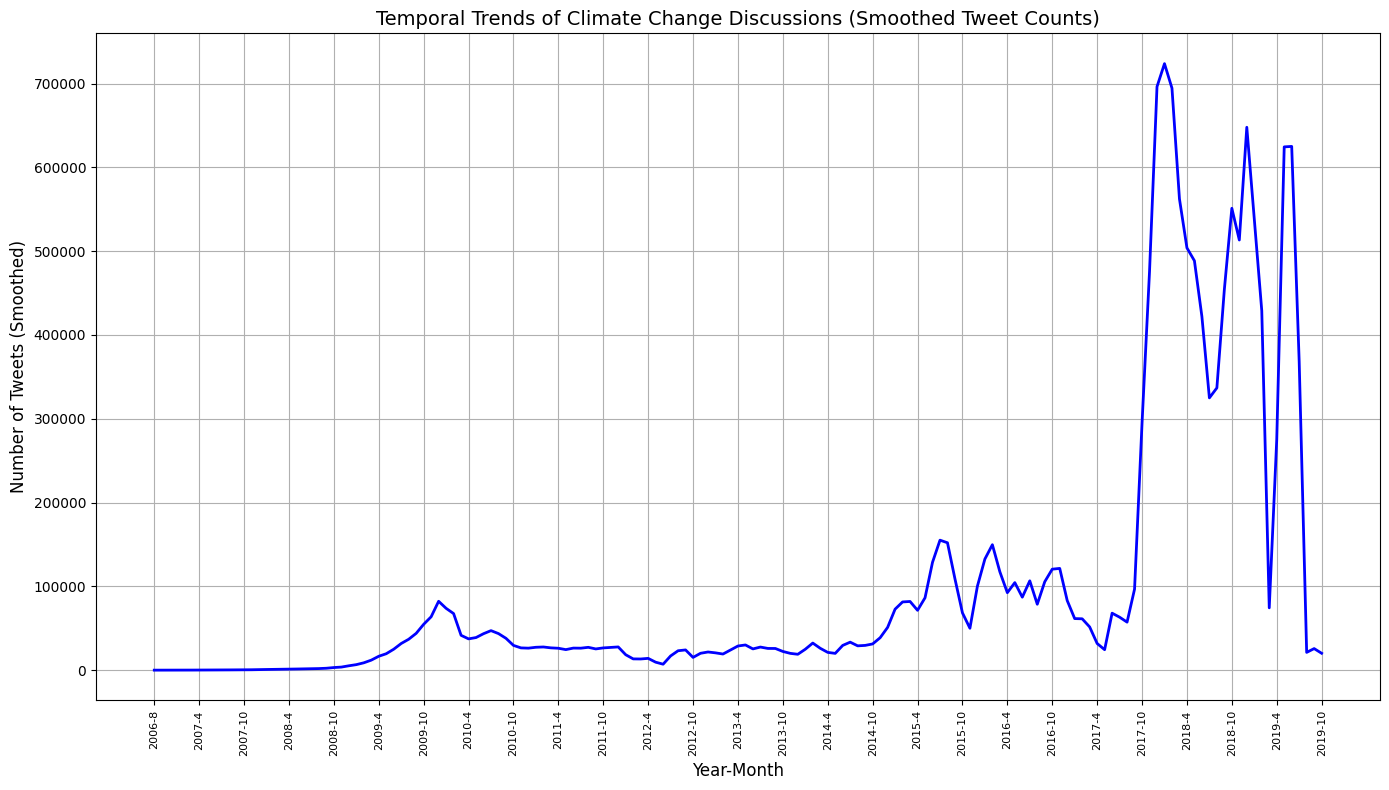

In [ ]:

# Apply a rolling average to smooth the temporal trends (window of 3 months, for example)
temporal_trends['tweet_count_smoothed'] = temporal_trends['tweet_count'].rolling(window=3).mean()

# Filter out rows with NaN values in 'tweet_count_smoothed'
temporal_trends_filtered = temporal_trends.dropna(subset=['tweet_count_smoothed'])

# Plot the data using the filtered DataFrame
plt.figure(figsize=(14, 8))
plt.plot(temporal_trends_filtered['year'].astype(str) + '-' + temporal_trends_filtered['month'].astype(str),
         temporal_trends_filtered['tweet_count_smoothed'], label='Smoothed Trend', color='b', lw=2)

# Rotate the x-axis labels and limit the number of ticks
plt.xticks(rotation=90, fontsize=8)

# Adjust x-ticks to show fewer labels, e.g., every 6 months
x_tick_labels = (temporal_trends_filtered['year'].astype(str) + '-' + temporal_trends_filtered['month'].astype(str)).tolist()
plt.xticks(ticks=range(len(x_tick_labels))[::6],  # Use indices for tick positions
           labels=[x_tick_labels[i] for i in range(len(x_tick_labels))[::6]],  # Select corresponding labels
           rotation=90)

# Set titles and labels
plt.title('Temporal Trends of Climate Change Discussions (Smoothed Tweet Counts)', fontsize=14)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Number of Tweets (Smoothed)', fontsize=12)

# Show gridlines for easier readability
plt.grid(True)

# Show the plot
plt.tight_layout()  # Adjust layout to ensure everything fits nicely
plt.show()

In [ ]:
# Summary Statistics
print("Summary Statistics:")
print(df.describe())


Summary Statistics:
                 id           lng           lat     sentiment  \
count  1.578941e+07  1.578941e+07  1.578941e+07  1.578941e+07   
mean   8.459853e+17 -4.639117e+01  3.408025e+01  4.532456e+06   
std    3.113522e+17  4.361782e+01  1.292580e+01  2.679318e+06   
min    6.132000e+03 -1.796670e+02 -9.000000e+01  0.000000e+00   
25%    7.354169e+17 -4.639117e+01  3.408025e+01  2.234636e+06   
50%    9.564851e+17 -4.639117e+01  3.408025e+01  4.462458e+06   
75%    1.049540e+18 -4.639117e+01  3.408025e+01  6.837942e+06   
max    1.178912e+18  1.793830e+02  8.500000e+01  9.350377e+06   

       temperature_avg  aggressiveness          year         month  
count     1.578941e+07    1.578941e+07  1.578941e+07  1.578941e+07  
mean      2.725274e-17    6.347692e-17  2.016639e+03  7.024364e+00  
std       1.000000e+00    1.000000e+00  2.514086e+00  3.647454e+00  
min      -1.113651e+01   -1.577221e+00  2.006000e+03  1.000000e+00  
25%       1.703091e-16   -1.577221e+00  2.016000e

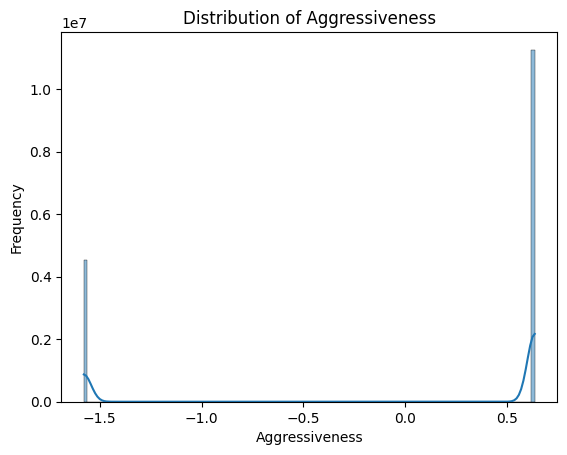

In [ ]:
# Visualizations
import seaborn as sns

# Histogram of 'aggressiveness'
sns.histplot(df['aggressiveness'], kde=True)
plt.title('Distribution of Aggressiveness')
plt.xlabel('Aggressiveness')
plt.ylabel('Frequency')
plt.show()

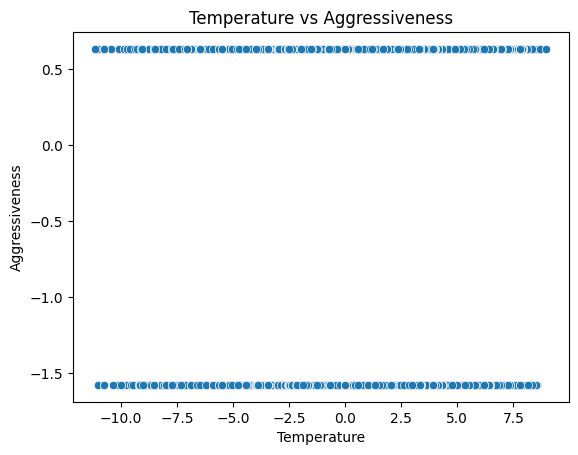

In [ ]:
# Scatter plot of 'temperature_avg' vs 'aggressiveness'
sns.scatterplot(x=df['temperature_avg'], y=df['aggressiveness'])
plt.title('Temperature vs Aggressiveness')
plt.xlabel('Temperature')
plt.ylabel('Aggressiveness')
plt.show()

In [ ]:
# Correlation Matrix
corr_matrix = df.corr()

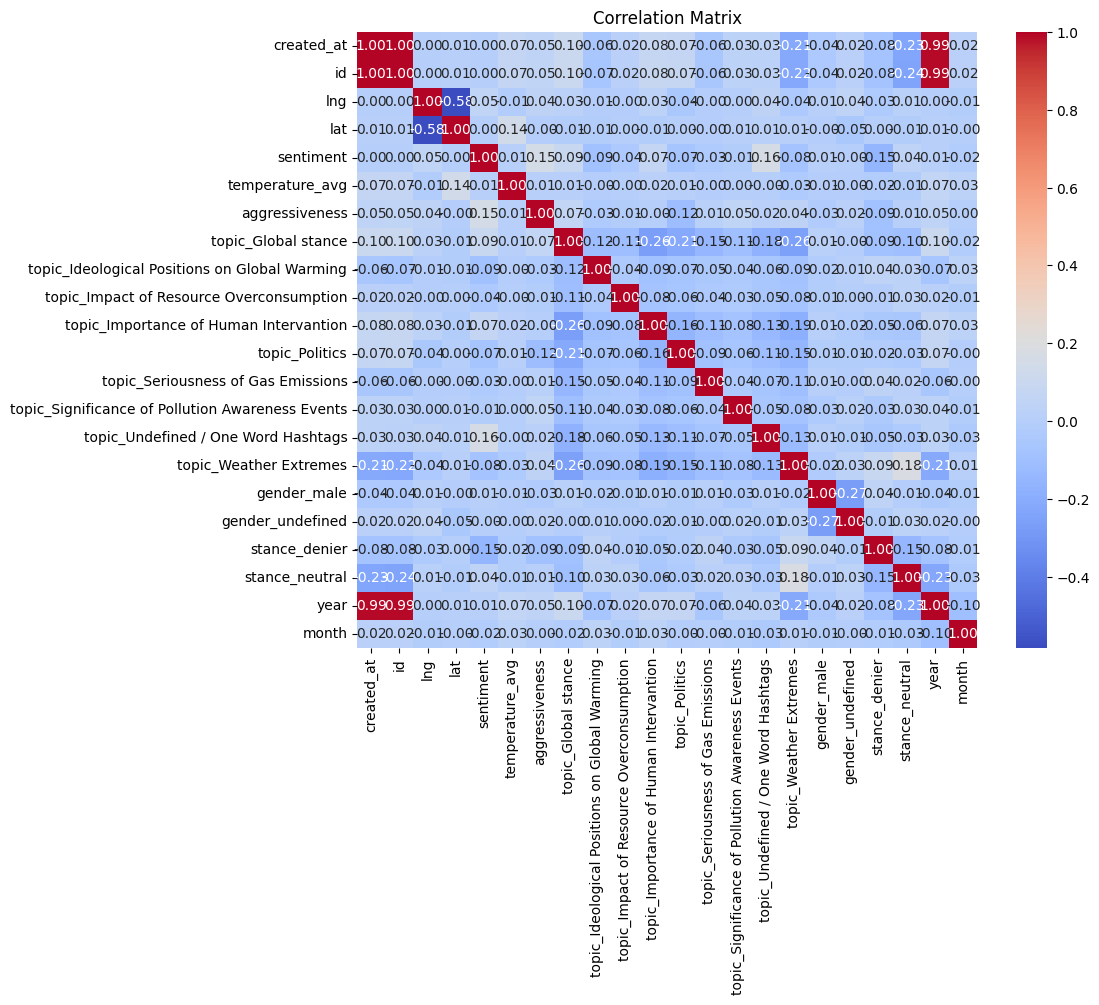

In [ ]:

# Heatmap to visualize correlations between variables
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Regression Analysis Example (Temperature vs Aggressiveness)
import statsmodels.api as sm

X = df[['temperature_avg']]  # Independent variable
y = df['aggressiveness']  # Dependent variable

# Adding constant for intercept
X = sm.add_constant(X)

# Fit regression model
model = sm.OLS(y, X).fit()

# Print regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         aggressiveness   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     466.9
Date:                Mon, 26 May 2025   Prob (F-statistic):          1.50e-103
Time:                        11:35:08   Log-Likelihood:            -2.2404e+07
No. Observations:            15789411   AIC:                         4.481e+07
Df Residuals:                15789409   BIC:                         4.481e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.573e-16      0.000   6.

In [ ]:
df.head()

,created_at,id,lng,lat,sentiment,temperature_avg,aggressiveness,topic_Global stance,topic_Ideological Positions on Global Warming,topic_Impact of Resource Overconsumption,...,topic_Seriousness of Gas Emissions,topic_Significance of Pollution Awareness Events,topic_Undefined / One Word Hashtags,topic_Weather Extremes,gender_male,gender_undefined,stance_denier,stance_neutral,year,month
0,2006-06-06 16:06:42+00:00,6132,-46.391175,34.080250,3779093,1.703091e-16,-1.577221,False,False,False,...,False,False,False,True,False,False,False,True,2006,6
1,2006-07-23 21:52:30+00:00,13275,-73.949582,40.650104,8255321,-1.071212e+00,-1.577221,False,False,False,...,False,False,False,True,False,True,False,True,2006,7
2,2006-08-29 01:52:30+00:00,23160,-46.391175,34.080250,7732424,1.703091e-16,-1.577221,False,False,False,...,False,False,False,True,True,False,False,True,2006,8
3,2006-11-07 02:46:52+00:00,57868,-46.391175,34.080250,4766870,1.703091e-16,-1.577221,False,False,False,...,False,False,False,True,True,False,False,True,2006,11
4,2006-11-27 14:27:43+00:00,304553,-46.391175,34.080250,3818099,1.703091e-16,-1.577221,False,False,False,...,False,False,False,False,True,False,False,True,2006,11


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# Define features and target variable
# Assuming 'stance_denier' is the target
X = df.drop(['created_at', 'id', 'stance_denier', 'stance_neutral'], axis=1)  # Features (excluding target and non-feature cols)
y = df['stance_denier']  # Target: stance_denier

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)



LogisticRegression(max_iter=1000)

In [ ]:
# Predictions
y_pred = model.predict(X_test)

# Evaluate model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

# ROC AUC Score
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print("ROC AUC Score:", roc_auc)

Accuracy: 0.9244759859690812
Classification Report:


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

       False       0.92      1.00      0.96   2919387
        True       0.00      0.00      0.00    238496

    accuracy                           0.92   3157883
   macro avg       0.46      0.50      0.48   3157883
weighted avg       0.85      0.92      0.89   3157883

ROC AUC Score: 0.6691643387547654


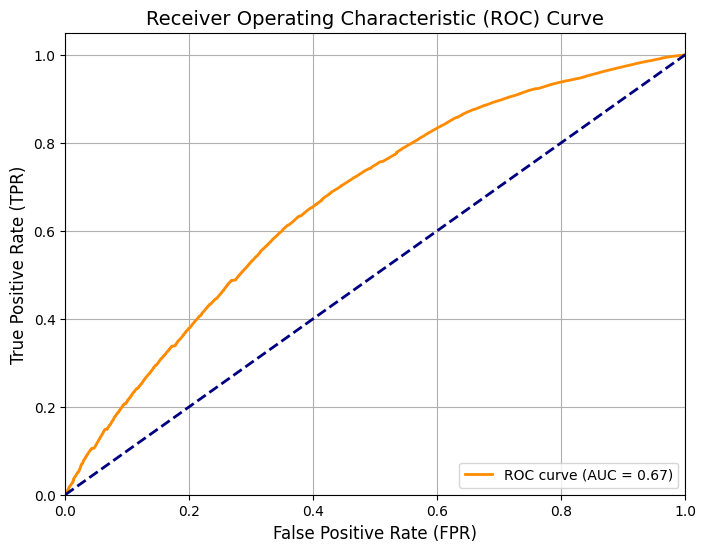

In [ ]:

from sklearn.metrics import roc_curve, auc

# Predict probabilities for the positive class (stance = 1 or 'supportive' class, for example)
y_prob = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Compute the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Random classifier line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR)', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=14)
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, roc_auc_score

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("\nRandom Forest:")
print(classification_report(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]))


## Data Understanding and Preprocessing on disaster dataset

In [ ]:
disaster = '/content/drive/MyDrive/disasters.csv'
df1=pd.read_csv(disaster)

In [ ]:
df1.head()

,Disaster Type,Disaster Subtype,Disaster Group,Disaster Subgroup,Event Name,Origin,Country,Location,Latitude,Longitude,start_date,end_date,Total Deaths,No Affected,Reconstruction Costs ('000 US$),Total Damages ('000 US$),CPI
0,Earthquake,Ground movement,Natural,Geophysical,NaN,NaN,Japan,"Nanao, Wajima districts (Isikawa province), Ni...",37.336,136.588,2007-03-25,2007-03-25,1.0,NaN,NaN,250000.0,81.101659
1,Storm,Tropical cyclone,Natural,Meteorological,Indhala,NaN,Madagascar,"Diana, Sava, Sofia, Analanjirofo provinces",-14.840,49.940,2007-03-15,2007-03-17,80.0,203182.0,NaN,240000.0,81.101659
2,Flood,Flash flood,Natural,Hydrological,NaN,Storms and heavy rains,Australia,"Gosford, Dungog, Newcastle, Wyong, Port Stephe...",-32.870,151.380,2007-06-08,2007-06-12,9.0,5000.0,NaN,1300000.0,81.101659
3,Flood,Riverine flood,Natural,Hydrological,NaN,Heavy rains,Haiti,"Ferrier village (Fort Liberte district, Nord E...",19.410,-71.780,2007-03-26,2007-03-30,14.0,15000.0,NaN,NaN,81.101659
4,Flood,Riverine flood,Natural,Hydrological,NaN,Heavy rains,Argentina,"Tucuman, Santiago del Estero, Salta, Formosa p...",NaN,NaN,2007-01-18,2007-03-20,5.0,60000.0,NaN,30000.0,81.101659


In [ ]:
df1.isnull().sum()

,0
Disaster Type,0
Disaster Subtype,701
Disaster Group,0
Disaster Subgroup,0
Event Name,3934
Origin,2846
Country,0
Location,126
Latitude,3623
Longitude,3619


In [ ]:
df1.describe()

,Latitude,Longitude,Total Deaths,No Affected,Reconstruction Costs ('000 US$),Total Damages ('000 US$),CPI
count,1290.000000,1294.000000,3583.000000,3.213000e+03,1.600000e+01,1.755000e+03,4544.000000
mean,19.328011,41.045957,203.965113,7.411172e+05,1.301854e+06,1.205278e+06,90.401750
std,88.671570,123.322345,4737.270923,7.419144e+06,2.859664e+06,6.787299e+06,5.716723
min,-913.908000,-955.370000,1.000000,2.000000e+00,1.510000e+03,2.000000e+00,81.101659
25%,-0.011000,-4.675000,4.000000,2.500000e+03,6.000000e+04,2.248000e+04,85.292061
50%,17.483500,48.765000,12.000000,1.500000e+04,1.970000e+05,1.368200e+05,91.120794
75%,34.770750,103.951000,30.000000,1.027170e+05,1.091438e+06,6.475000e+05,93.878436
max,995.267000,952.600000,222570.000000,3.300000e+08,1.150000e+07,2.100000e+08,100.000000


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4913 entries, 0 to 4912
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Disaster Type                    4913 non-null   object 
 1   Disaster Subtype                 4212 non-null   object 
 2   Disaster Group                   4913 non-null   object 
 3   Disaster Subgroup                4913 non-null   object 
 4   Event Name                       979 non-null    object 
 5   Origin                           2067 non-null   object 
 6   Country                          4913 non-null   object 
 7   Location                         4787 non-null   object 
 8   Latitude                         1290 non-null   float64
 9   Longitude                        1294 non-null   float64
 10  start_date                       4913 non-null   object 
 11  end_date                         4913 non-null   object 
 12  Total Deaths        

In [ ]:
# === Handling Missing Values ===

# Categorical columns: fill with meaningful placeholders
df1['Disaster Subtype'].fillna('Unknown', inplace=True)
df1['Event Name'].fillna('Not Specified', inplace=True)
df1['Origin'].fillna('Unknown', inplace=True)
df1['Location'].fillna('Unknown', inplace=True)

# Numeric columns: fill with median
num_cols_to_fill = ['Latitude', 'Longitude', 'Total Deaths', 'No Affected',
                    "Reconstruction Costs ('000 US$)", "Total Damages ('000 US$)", 'CPI']

<ipython-input-39-241f84690377>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['Disaster Subtype'].fillna('Unknown', inplace=True)
<ipython-input-39-241f84690377>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t

In [ ]:
for col in num_cols_to_fill:
    df1[col].fillna(df1[col].median(), inplace=True)

print("\nMissing Values After Filling:")
print(df1.isnull().sum())


Missing Values After Filling:
Disaster Type                      0
Disaster Subtype                   0
Disaster Group                     0
Disaster Subgroup                  0
Event Name                         0
Origin                             0
Country                            0
Location                           0
Latitude                           0
Longitude                          0
start_date                         0
end_date                           0
Total Deaths                       0
No Affected                        0
Reconstruction Costs ('000 US$)    0
Total Damages ('000 US$)           0
CPI                                0
dtype: int64


<ipython-input-40-550d06729b53>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[col].fillna(df1[col].median(), inplace=True)


In [ ]:
# === Convert date columns ===
df1['start_date'] = pd.to_datetime(df1['start_date'], errors='coerce')
df1['end_date'] = pd.to_datetime(df1['end_date'], errors='coerce')



In [ ]:
# === Feature Engineering ===
df1['duration_days'] = (df1['end_date'] - df1['start_date']).dt.days


In [ ]:
# === Encode Categorical Features ===
cat_cols = df1.select_dtypes(include='object').columns
label_encoders = {}

for col in cat_cols:
    le = LabelEncoder()
    df1[col] = le.fit_transform(df1[col])
    label_encoders[col] = le



In [ ]:
# === Scaling Numeric Columns ===
num_cols = df1.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
df1[num_cols] = scaler.fit_transform(df1[num_cols])



In [ ]:
from sklearn.decomposition import PCA
# === PCA for Dimensionality Reduction ===
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df1[num_cols])
df1['PCA1'] = pca_result[:, 0]
df1['PCA2'] = pca_result[:, 1]


## Data Wrangling operations

In [ ]:
# 2. DATA WRANGLING OPERATIONS
# -------------------------------
# Dates already converted, duration created, categorical encoded
# No merging required for this single dataset example


## Descriptive analytics

In [ ]:
# 3. DESCRIPTIVE ANALYTICS
# -------------------------------

# Summary statistics
print("\nSummary Statistics:")
print(df1.describe())



Summary Statistics:
       Disaster Type  Disaster Subtype  Disaster Group  Disaster Subgroup  \
count   4.913000e+03      4.913000e+03          4913.0       4.913000e+03   
mean    5.495751e-17      8.677501e-17             0.0       2.603250e-17   
min    -2.035574e+00     -2.092012e+00             0.0      -2.652830e+00   
25%    -4.345107e-01     -9.771691e-01             0.0      -1.726485e-01   
50%    -4.345107e-01      4.562003e-01             0.0      -1.726485e-01   
75%     1.166553e+00      9.339901e-01             0.0       1.067442e+00   
max     2.233928e+00      1.252517e+00             0.0       1.067442e+00   
std     1.000102e+00      1.000102e+00             0.0       1.000102e+00   

         Event Name        Origin       Country      Location      Latitude  \
count  4.913000e+03  4.913000e+03  4.913000e+03  4.913000e+03  4.913000e+03   
mean   8.677501e-17  1.330550e-16  8.677501e-17 -1.157000e-16  4.049501e-17   
min   -3.431178e+00 -2.254908e+00 -1.676555e+00 

## Exploratory Data analysis (EDA)

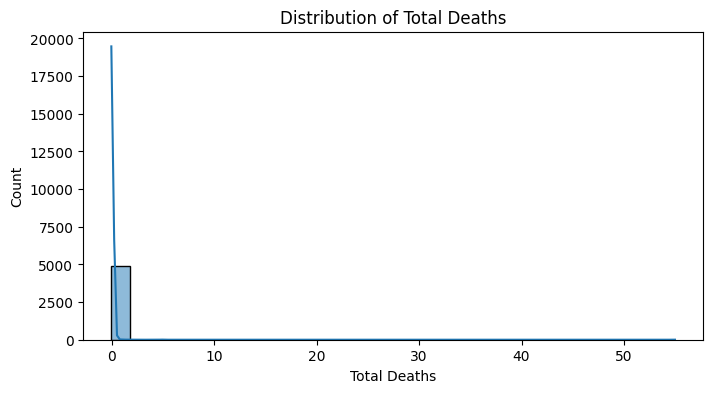

In [ ]:
# Plot: Total Deaths
plt.figure(figsize=(8, 4))
sns.histplot(df1['Total Deaths'], kde=True, bins=30)
plt.title("Distribution of Total Deaths")
plt.xlabel("Total Deaths")
plt.show()


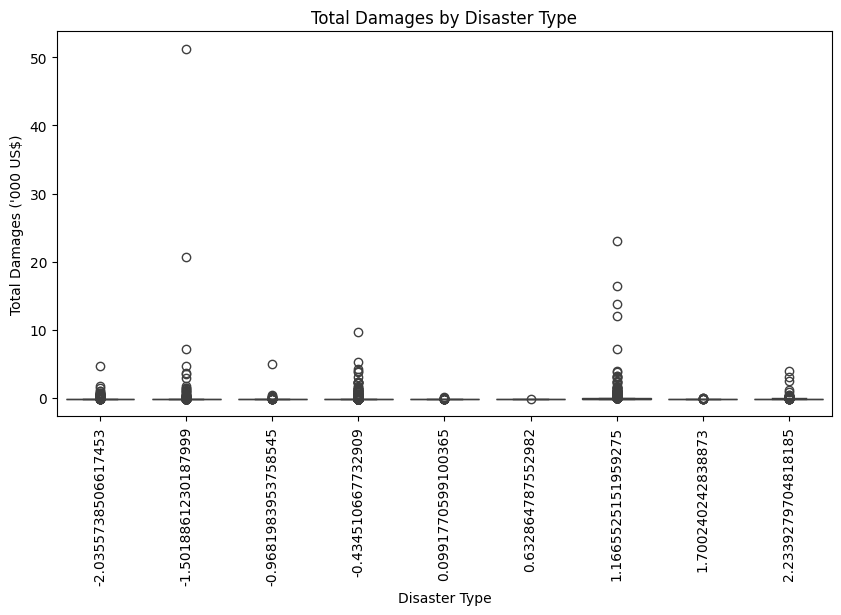

In [ ]:

# Plot: Total Damages by Disaster Type
plt.figure(figsize=(10, 5))
sns.boxplot(x=df1['Disaster Type'], y=df1["Total Damages ('000 US$)"])
plt.xticks(rotation=90)
plt.title("Total Damages by Disaster Type")
plt.show()



## Diagnostic analytics

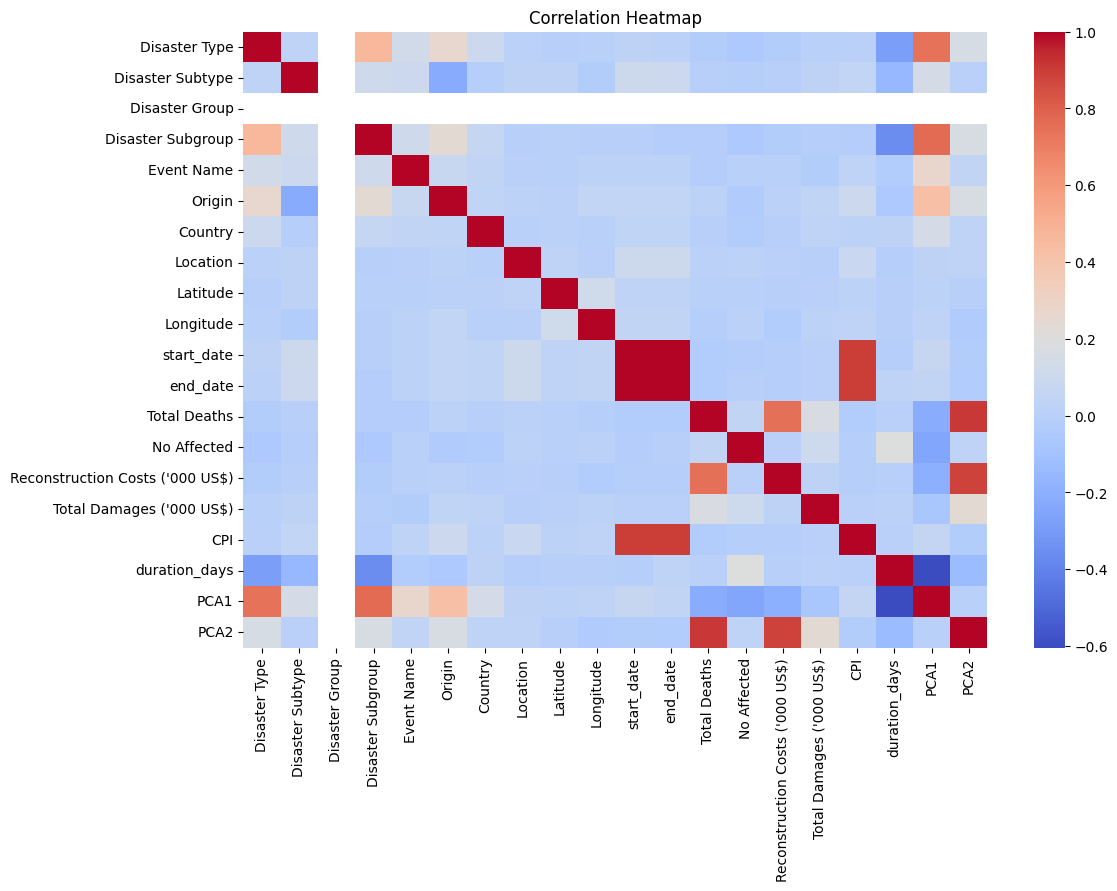

In [ ]:
# 4. DIAGNOSTIC ANALYTICS
# -------------------------------

# Correlation Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df1.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()



In [ ]:
from sklearn.linear_model import LinearRegression
# Linear Regression: Predict Total Damages from Deaths + No Affected
X_diag = df1[['Total Deaths', 'No Affected']]
y_diag = df1["Total Damages ('000 US$)"]
lin_reg = LinearRegression()
lin_reg.fit(X_diag, y_diag)


LinearRegression()

In [ ]:
print("\nDiagnostic Regression Coefficients:", lin_reg.coef_)



Diagnostic Regression Coefficients: [0.16747305 0.10015966]


## Predictive analytics

In [ ]:
# 5. PREDICTIVE ANALYTICS
# -------------------------------

# Create target: high damage (top 25%)
threshold = df1["Total Damages ('000 US$)"].quantile(0.75)
df1['high_damage'] = (df1["Total Damages ('000 US$)"] >= threshold).astype(int)


In [ ]:
# Model features
X = df1.drop(['high_damage', 'start_date', 'end_date', "Total Damages ('000 US$)"], axis=1)
y = df1['high_damage']



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       172
           1       0.82      1.00      0.90       811

    accuracy                           0.82       983
   macro avg       0.41      0.50      0.45       983
weighted avg       0.68      0.82      0.74       983



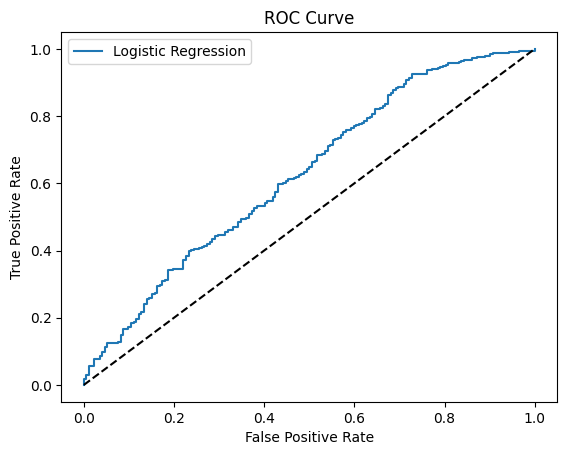

In [ ]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label="Logistic Regression")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()



In [ ]:
print("ROC AUC Score:", roc_auc_score(y_test,y_proba))

ROC AUC Score: 0.6258280044733748
